# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 9.2 MB/s eta 0:00:011
     |███████████████████████▌        | 14.2 MB 7.0 MB/s eta 0:00:01^C

ERROR: Operation cancelled by user


## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 70.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install ipywidgets tqdm --upgrade

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: ipywidgets in /root/.local/lib/python3.7/site-packages (8.1.3)
     |████████████████████████████████| 78 kB 833 kB/s eta 0:00:011
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [5]:
from torch.utils.data import DataLoader

In [6]:
from torchvision import datasets, transforms

In [7]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create training set and define training dataloader
train_dataset = datasets.MNIST(root = "data", train = True, download = True, transform = transform) 
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_dataset = datasets.MNIST(root = "data", train = False, download = True, transform = transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle = False)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

For the MNIST dataset, 2 transforms were chosen - ToTensor() and Normalize() as visible by the code: transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]).
The ToTensor() transform converts the images from PIL format to PyTorch tensors. It thus, provides input in the form of tensors.
The Normalize() transform standardizes the pixel values of the images. Here, the normalization is done with mean and standard deviation values of 0.5. Hence, The normalized pixel values will be in the range [−1,1].

No, I did not use any preprocessing steps as the images in the dataset are grayscale and have a uniform size of 28 * 28 pixels. Thus, there was no need to include any additional color or resizing transformations.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [8]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [9]:
len(train_dataset)

60000

In [10]:
len(test_dataset)

10000

6


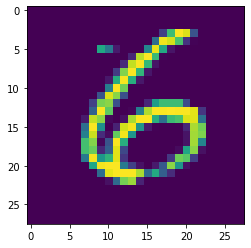

1


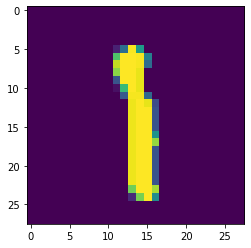

5


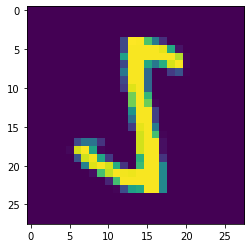

7


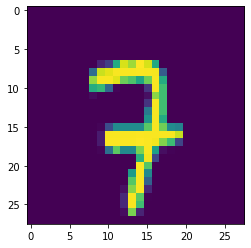

4


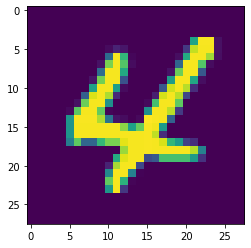

In [11]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [12]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [13]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.activation = F.relu
        
        # NN Layers
        self.l1 = nn.Linear(28 * 28 * 1, 512)
        self.l2 = nn.Linear(512, 256)
        self.l3 = nn.Linear(256, 128)
        self.l4 = nn.Linear(128, 64)
        self.l5 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.l1(x))
        x = self.activation(self.l2(x))
        x = self.activation(self.l3(x))
        x = self.activation(self.l4(x))
        x = self.l5(x)
        return x

In [14]:
net = NeuralNetwork().to(device)
print(net)

NeuralNetwork(
  (l1): Linear(in_features=784, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=256, bias=True)
  (l3): Linear(in_features=256, out_features=128, bias=True)
  (l4): Linear(in_features=128, out_features=64, bias=True)
  (l5): Linear(in_features=64, out_features=10, bias=True)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [15]:
# loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [16]:
# Learning rate scheduler
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [17]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
net.to(device)

NeuralNetwork(
  (l1): Linear(in_features=784, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=256, bias=True)
  (l3): Linear(in_features=256, out_features=128, bias=True)
  (l4): Linear(in_features=128, out_features=64, bias=True)
  (l5): Linear(in_features=64, out_features=10, bias=True)
)

In [19]:
epochs = 10
trainingLossHistory = list()

for epoch in range(epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()

        # Print loss every 250 batches
        if (i + 1) % 250 == 0:
            print(f'Epoch {epoch + 1}/{epochs}, Batch {i + 1}/{len(train_loader)}, Loss: {loss.item():.4f}')

    training_accuracy = (train_correct / len(train_loader.dataset)) * 100
    training_loss = train_loss / len(train_loader)
    trainingLossHistory.append(training_loss)

    print(f'Epoch {epoch + 1}/{epochs}, Training Accuracy: {training_accuracy:.2f}%, Training Loss: {training_loss:.5f}')

Epoch 1/10, Batch 250/938, Loss: 0.7032
Epoch 1/10, Batch 500/938, Loss: 0.2480
Epoch 1/10, Batch 750/938, Loss: 0.1362
Epoch 1/10, Training Accuracy: 80.49%, Training Loss: 0.62705
Epoch 2/10, Batch 250/938, Loss: 0.0904
Epoch 2/10, Batch 500/938, Loss: 0.1163
Epoch 2/10, Batch 750/938, Loss: 0.0780
Epoch 2/10, Training Accuracy: 94.81%, Training Loss: 0.16918
Epoch 3/10, Batch 250/938, Loss: 0.2755
Epoch 3/10, Batch 500/938, Loss: 0.1367
Epoch 3/10, Batch 750/938, Loss: 0.0674
Epoch 3/10, Training Accuracy: 96.23%, Training Loss: 0.12246
Epoch 4/10, Batch 250/938, Loss: 0.1142
Epoch 4/10, Batch 500/938, Loss: 0.1077
Epoch 4/10, Batch 750/938, Loss: 0.1830
Epoch 4/10, Training Accuracy: 97.10%, Training Loss: 0.09192
Epoch 5/10, Batch 250/938, Loss: 0.1743
Epoch 5/10, Batch 500/938, Loss: 0.0464
Epoch 5/10, Batch 750/938, Loss: 0.0108
Epoch 5/10, Training Accuracy: 97.61%, Training Loss: 0.07678
Epoch 6/10, Batch 250/938, Loss: 0.1446
Epoch 6/10, Batch 500/938, Loss: 0.0394
Epoch 6/10

Plot the training loss (and validation loss/accuracy, if recorded).

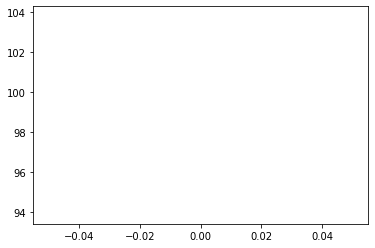

In [24]:
plt.plot(training_accuracy, label="Training Accuracy")
plt.show()

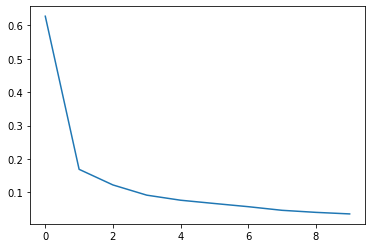

In [25]:
plt.plot(trainingLossHistory, label="Training Loss History")
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [26]:
net.eval()
test_loss = 0.0
test_correct = 0

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        test_loss += loss.item()
        
        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()

test_accuracy = (test_correct / len(test_loader.dataset)) * 100 
test_loss /= len(test_loader)

print(f'Test Accuracy: {test_accuracy:.2f}%, Test Loss: {test_loss:.5f}')

Test Accuracy: 98.16%, Test Loss: 0.06352


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [147]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.activation = F.relu
        
        self.l1 = nn.Linear(28 * 28 * 1, 512)
        self.dropout1 = nn.Dropout(0.5)
        self.l2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.5)
        self.l3 = nn.Linear(256, 128)
        self.dropout3 = nn.Dropout(0.5)
        self.l4 = nn.Linear(128, 64)
        self.l5 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.l1(x))
        x = self.dropout1(x)
        x = self.activation(self.l2(x))
        x = self.dropout2(x)
        x = self.activation(self.l3(x))
        x = self.dropout3(x)
        x = self.activation(self.l4(x))
        x = self.l5(x)
        return x

In [150]:
net2 = NeuralNetwork()
print(net2)

NeuralNetwork(
  (l1): Linear(in_features=784, out_features=512, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (l2): Linear(in_features=512, out_features=256, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (l3): Linear(in_features=256, out_features=128, bias=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (l4): Linear(in_features=128, out_features=64, bias=True)
  (l5): Linear(in_features=64, out_features=10, bias=True)
)


In [155]:
net2 = NeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net2.parameters(), lr=1e-3)

In [156]:
# Training improved model 
epochs = 15
trainingLossHistory = list()

for epoch in range(epochs):
    net2.train()
    train_loss = 0.0
    train_correct = 0
    
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()

        # Print loss every 250 batches
        if (i + 1) % 250 == 0:
            print(f'Epoch {epoch + 1}/{epochs}, Batch {i + 1}/{len(train_loader)}, Loss: {loss.item():.4f}')
    
    
    
    training_accuracy = (train_correct / len(train_loader.dataset)) * 100
    training_loss = train_loss / len(train_loader)
    trainingLossHistory.append(training_loss)

    print(f'Epoch {epoch + 1}/{epochs}, Training Accuracy: {training_accuracy:.2f}%, Training Loss: {training_loss:.5f}')
    
    

Epoch 1/15, Batch 250/938, Loss: 0.2515
Epoch 1/15, Batch 500/938, Loss: 0.1551
Epoch 1/15, Batch 750/938, Loss: 0.5117
Epoch 1/15, Training Accuracy: 91.65%, Training Loss: 0.29403
Epoch 2/15, Batch 250/938, Loss: 0.4572
Epoch 2/15, Batch 500/938, Loss: 0.1953
Epoch 2/15, Batch 750/938, Loss: 0.2257
Epoch 2/15, Training Accuracy: 91.55%, Training Loss: 0.29731
Epoch 3/15, Batch 250/938, Loss: 0.4192
Epoch 3/15, Batch 500/938, Loss: 0.4509
Epoch 3/15, Batch 750/938, Loss: 0.2635
Epoch 3/15, Training Accuracy: 91.52%, Training Loss: 0.29622
Epoch 4/15, Batch 250/938, Loss: 0.2312
Epoch 4/15, Batch 500/938, Loss: 0.1089
Epoch 4/15, Batch 750/938, Loss: 0.2156
Epoch 4/15, Training Accuracy: 91.62%, Training Loss: 0.29676
Epoch 5/15, Batch 250/938, Loss: 0.1656
Epoch 5/15, Batch 500/938, Loss: 0.3670
Epoch 5/15, Batch 750/938, Loss: 0.2888
Epoch 5/15, Training Accuracy: 91.62%, Training Loss: 0.29885
Epoch 6/15, Batch 250/938, Loss: 0.3222
Epoch 6/15, Batch 500/938, Loss: 0.4032
Epoch 6/15

In [157]:
# Testing improved model
net2.eval()
test_loss = 0.0
test_correct = 0

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        test_loss += loss.item()
        
        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()

test_accuracy = (test_correct / len(test_loader.dataset)) * 100 
test_loss /= len(test_loader)

print(f'Final Test Accuracy: {test_accuracy:.2f}%, Test Loss: {test_loss:.5f}')

Final Test Accuracy: 91.47%, Test Loss: 0.29880


In [ ]:
*After tweaking the parameters, changing learning rates, optimizers and neural network structures, it

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
torch.save(net, "model1.pth")
torch.save(net2, "model2.pth")